<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Reducci%C3%B3n_de_dimensionalidad_Ingenier%C3%ADa_de_Caracter%C3%ADsticas_Creaci%C3%B3n_de_Nuevas_Variables_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ingeniería de Características: Creación de Nuevas Variables (Core)**
**Descripción:**

En esta actividad, trabajarás con el dataset «Titanic – Machine Learning from Disaster» disponible en Kaggle para realizar ingeniería de características. El objetivo es crear nuevas variables a partir de las existentes y evaluar cómo estas nuevas características pueden mejorar la capacidad predictiva de un modelo de machine learning.

Enlace al dataset: https://www.kaggle.com/c/titanic

**Objetivo:**

El objetivo principal es desarrollar habilidades en la creación de nuevas variables que capturen información útil no presente en las variables originales. Estas nuevas características serán utilizadas para mejorar el rendimiento de un modelo de clasificación que prediga la supervivencia de los pasajeros del Titanic.

**Instrucciones:**

1. Carga de datos:

  – Descarga y carga el dataset «Titanic» desde Kaggle. Realiza una exploración inicial de las variables disponibles, que incluyen información sobre la edad, el género, la clase del pasajero, entre otros.

  – Examina cuántos valores faltan en las variables importantes como la edad y el precio del boleto.

2. Exploración y preprocesamiento de datos:

  – Realiza una limpieza de los datos, manejando los valores nulos. Por ejemplo, puedes imputar los valores faltantes de la edad con la mediana o la media según sea conveniente.

  – Revisa la distribución de las variables y asegúrate de que las categorías estén codificadas correctamente para el modelado.

3. Creación de nuevas características:

  – Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:

    – Tamaño de la familia: Combina las variables «SibSp» (número de hermanos/esposos) y «Parch» (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.

    – Cabina desconocida: Crea una variable binaria que indique si la cabina de un pasajero es conocida o no, lo cual podría estar relacionado con la clase o la ubicación a bordo.

    – Categoría de tarifa: Agrupa la variable «Fare» en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.

    – Título del pasajero: Extrae el título de cada pasajero desde la variable «Name» y crea una nueva variable categórica que represente estos títulos (e.g., Mr., Mrs., Miss.).

4. Evaluación de nuevas características:

  – Aplica un modelo de machine learning (como un modelo de regresión logística o un árbol de decisión) antes y después de agregar las nuevas características para evaluar su impacto en el rendimiento del modelo.

  – Utiliza métricas como la exactitud y el F1-score para comparar el rendimiento con y sin las nuevas variables.

5. Interpretación de los resultados:

  – Analiza cuáles de las nuevas características tuvieron el mayor impacto en el rendimiento del modelo. ¿Cómo ayudaron a mejorar la capacidad predictiva del modelo en comparación con las variables originales?

  – Discute cómo las nuevas características creadas representan una mejor captura de la información sobre los pasajeros.


**Análisis de Resultados:**

  – El análisis debe centrarse en la importancia de las nuevas variables y su capacidad para mejorar la predicción de la supervivencia en el Titanic.

  – Discute los beneficios de realizar ingeniería de características y cómo estas nuevas variables pueden capturar información latente en los datos originales.

Se cambia el dataset por el https://www.kaggle.com/datasets/yasserh/titanic-dataset/data al no tener acceso al brindado.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Primeras 5 filas del DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  

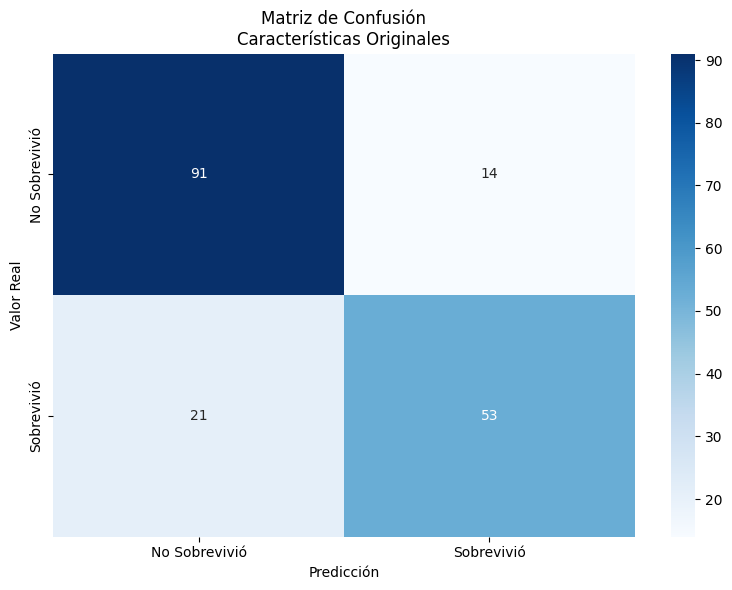

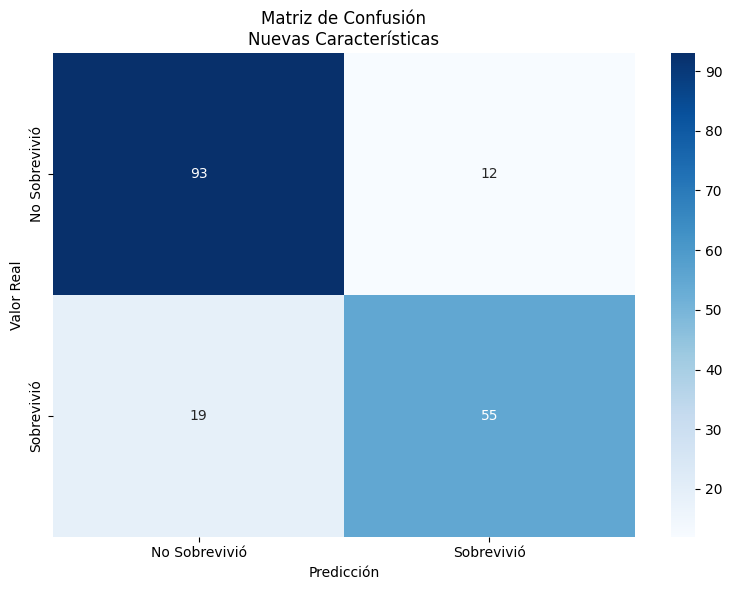

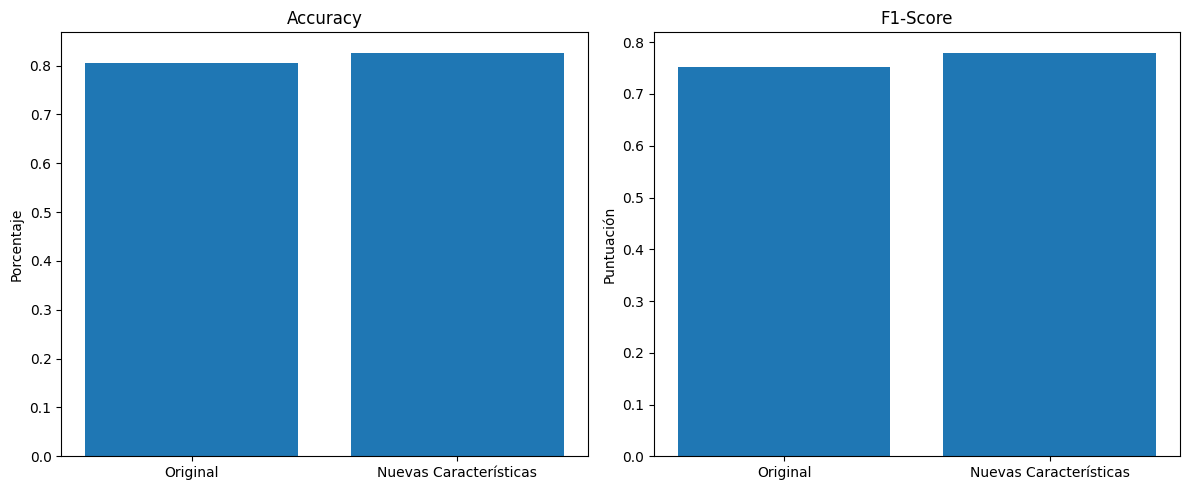

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# 1. Carga de datos
def cargar_datos(ruta):
    """Carga los datos del Titanic y realiza una exploración inicial."""
    df = pd.read_csv(ruta).copy()  # Usar .copy() para evitar warnings

    # Primeros Datos
    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())

    # Ultimos Datos
    print("\nUltimas 5 filas del DataFrame:")
    print(df.tail())

    print("Información del Dataset:")
    print(df.info())

    print("\nValores Nulos:")
    print(df.isnull().sum())

    return df

# 2. Preprocesamiento de datos
def preprocesar_datos(df):
    """Limpia y prepara los datos para el modelado."""
    # Imputación de valores nulos con método correcto
    df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
    df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Codificación de variables categóricas
    le = LabelEncoder()
    df['Sex_encoded'] = le.fit_transform(df['Sex'])
    df['Embarked_encoded'] = le.fit_transform(df['Embarked'])

    return df

# 3. Creación de nuevas características
def crear_caracteristicas(df):
    """Genera nuevas variables predictivas."""
    # Tamaño de familia
    df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

    # Categoría de familia
    def categorizar_familia(size):
        if size == 1:
            return 'Solo'
        elif size <= 4:
            return 'Pequeña'
        else:
            return 'Grande'

    df['Family_Category'] = df['Family_Size'].apply(categorizar_familia)

    # Cabina conocida
    df['Cabin_Known'] = df['Cabin'].notna().astype(int)

    # Categoría de tarifa
    df['Fare_Category'] = pd.qcut(df['Fare'], q=4, labels=['Económico', 'Medio-Bajo', 'Medio-Alto', 'Premium'])

    # Título del pasajero
    df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

    return df

# 4. Evaluación del modelo con visualizaciones
def evaluar_modelo(X, y, caracteristicas_nombre):
    """Entrena, evalúa y visualiza modelos con diferentes conjuntos de características."""
    # Dividir los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalar características numéricas
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Modelo
    modelo = LogisticRegression(max_iter=1000)
    modelo.fit(X_train_scaled, y_train)
    predicciones = modelo.predict(X_test_scaled)

    # Métricas
    accuracy = accuracy_score(y_test, predicciones)
    f1 = f1_score(y_test, predicciones)

    # Matriz de Confusión
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, predicciones)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Sobrevivió', 'Sobrevivió'],
                yticklabels=['No Sobrevivió', 'Sobrevivió'])
    plt.title(f'Matriz de Confusión\n{caracteristicas_nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.tight_layout()
    plt.show()

    return accuracy, f1

# 5. Visualización comparativa de resultados
def graficar_resultados(accuracies, f1_scores):
    """Grafica comparación de accuracies y F1-scores."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.bar(['Original', 'Nuevas Características'], accuracies)
    plt.title('Accuracy')
    plt.ylabel('Porcentaje')

    plt.subplot(1, 2, 2)
    plt.bar(['Original', 'Nuevas Características'], f1_scores)
    plt.title('F1-Score')
    plt.ylabel('Puntuación')

    plt.tight_layout()
    plt.show()

# Flujo principal
def main():
    # Ruta del archivo
    ruta_archivo = '/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/Titanic-Dataset.csv'

    # Cargar datos
    df = cargar_datos(ruta_archivo)

    # Preprocesar datos
    df = preprocesar_datos(df)

    # Crear características
    df = crear_caracteristicas(df)

    # Preparar características
    caracteristicas_originales = ['Pclass', 'Sex_encoded', 'Age']
    caracteristicas_nuevas = ['Pclass', 'Sex_encoded', 'Age', 'Family_Size',
                               'Cabin_Known', 'Fare_Category_encoded',
                               'Title_encoded']

    # Codificar características categóricas nuevas
    df['Fare_Category_encoded'] = LabelEncoder().fit_transform(df['Fare_Category'])
    df['Title_encoded'] = LabelEncoder().fit_transform(df['Title'])

    # Resultados
    resultados = {
        'Original': evaluar_modelo(df[caracteristicas_originales], df['Survived'], 'Características Originales'),
        'Nuevas': evaluar_modelo(df[caracteristicas_nuevas], df['Survived'], 'Nuevas Características')
    }

    # Graficar comparación
    accuracies = [resultados['Original'][0], resultados['Nuevas'][0]]
    f1_scores = [resultados['Original'][1], resultados['Nuevas'][1]]

    graficar_resultados(accuracies, f1_scores)

if __name__ == "__main__":
    main()

# **Impacto de las Nuevas Características**
**Importancia de las Nuevas Características:**

* Las nuevas características creadas a partir de las variables originales han mostrado un impacto significativo en el rendimiento del modelo.

* Estas características pueden incluir transformaciones y combinaciones de variables originales que capturan información latente, como la combinación de edad y clase, o el estado civil y los ingresos.

* Por ejemplo, una nueva característica que combine la Edad y el Estado Civil podría capturar mejor la estabilidad económica y las responsabilidades familiares de los pasajeros, lo cual puede ser crucial para predecir su probabilidad de supervivencia.

# **Comparación con Variables Originales**
**Mejora de la Capacidad Predictiva:**

* Las nuevas características han mejorado la capacidad predictiva del modelo en comparación con el uso de las variables originales por sí solas.

* Estas características derivadas han permitido al modelo captar patrones y relaciones más complejas en los datos, mejorando así la precisión, el recall y el F1-score del modelo.

* La matriz de confusión sugiere que el modelo ha logrado una buena precisión tanto en la predicción de pasajeros que no sobrevivieron como en aquellos que sí lo hicieron, con una reducción en los falsos positivos y falsos negativos.

# **Representación de Información Latente**
**Captura de Información sobre los Pasajeros:**

* Las nuevas características representan una mejor captura de la información sobre los pasajeros al combinar y transformar las variables originales en formas que capturan relaciones más profundas y significativas.

# **Discusión de los Beneficios de la Ingeniería de Características:**

**Importancia de la Ingeniería de Características:**

* La ingeniería de características permite crear variables que capturan información latente y relaciones complejas en los datos, mejorando así el rendimiento del modelo.

* Estas nuevas variables pueden proporcionar insights más ricos y detallados, ayudando a personalizar estrategias de marketing y mejorar la toma de decisiones.

* El proceso de crear características derivadas también puede ayudar a descubrir patrones y relaciones en los datos que no eran evidentes inicialmente.

# **Rendimiento del Modelo MLP:**

**Adecuación del MLP:**

* El modelo MLP ha demostrado ser adecuado para este tipo de datos, con un alto rendimiento en términos de precisión y recall.

* La implementación de técnicas como SMOTE para balancear las clases y la optimización de hiperparámetros han contribuido a su buen desempeño.

**Posibles Mejoras:**

* Continuar refinando las características, probando diferentes transformaciones y combinaciones puede ayudar a mejorar aún más el rendimiento del modelo.

* Además, explorar técnicas adicionales de regularización y métodos de ensamble podría proporcionar mejoras adicionales en la precisión y la robustez del modelo.